In [7]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [3]:
# Load the train dataset
# TODO Train Data 경로 입력
dataset = pd.read_csv('../data/train.csv') 

# Flatten the JSON dataset
records = []
for _, row in dataset.iterrows():
    problems = literal_eval(row['problems'])
    record = {
        'id': row['id'],
        'paragraph': row['paragraph'],
        'question': problems['question'],
        'choices': problems['choices'],
        'answer': problems.get('answer', None),
        "question_plus": problems.get('question_plus', None),
    }
    # Include 'question_plus' if it exists
    if 'question_plus' in problems:
        record['question_plus'] = problems['question_plus']
    records.append(record)
        
# Convert to DataFrame
df = pd.DataFrame(records)

In [4]:
print(len(df))

2031


In [5]:
# paragraph 중복 분석
paragraph_counts = df['paragraph'].value_counts()

print("=== Paragraph 중복 현황 ===")
print(f"전체 문제 수: {len(df)}")
print(f"고유한 paragraph 수: {df['paragraph'].nunique()}")
print(f"중복된 paragraph 수: {(paragraph_counts > 1).sum()}")
print(f"\n평균 문제 수 (paragraph당): {paragraph_counts.mean():.2f}")
print(f"최대 문제 수 (하나의 paragraph): {paragraph_counts.max()}")

print("\n=== Paragraph별 문제 개수 분포 ===")
print(paragraph_counts.value_counts().sort_index())

print("\n=== 가장 많은 문제를 가진 paragraph Top 5 ===")
print(paragraph_counts.head())



=== Paragraph 중복 현황 ===
전체 문제 수: 2031
고유한 paragraph 수: 1871
중복된 paragraph 수: 122

평균 문제 수 (paragraph당): 1.09
최대 문제 수 (하나의 paragraph): 5

=== Paragraph별 문제 개수 분포 ===
count
1    1749
2      93
3      22
4       5
5       2
Name: count, dtype: int64

=== 가장 많은 문제를 가진 paragraph Top 5 ===
paragraph
사티 관행의 존폐 여부를 결정하는 일은 끔찍한 책임감과 동일한 관련이 있습니다. 이를 막을 수 있는 힘이 있는데도 불구하고, 수백 명의 무고한 희생자들을 매년 잔혹하고 너무 이른 죽음에 방치하는 것은 양심이 있는 인간이라면 공포를 느끼지 않을 수 없는 잔혹 행위입니다. 반면, 인도에 주둔한 영국 제국의 안전을 위험에 빠뜨리는 일은 훨씬 더 큰 악행으로 간주될 수 있습니다. 우리에게 강력한 이웃이 있었고 우리의 안보를 의심할 만한 더 큰 위협이 있었을 때라면 보다 신중하게 진행하도록 했겠지만, 우리가 가장 우위를 점하고 있는 현재, 저는 공개적이고 전면적인 금지 조치에 찬성합니다. William Bentinck, 인도 총독, "사티 억압에 관하여," 1829 나는 [우리와 거래하는] 인디언들의 본성과 성격을 조사하는 일을 연구로 삼았으며, 그것이 우리의 감정에 아무리 불쾌하더라도 나는 그들이 적절한 종속 상태에 있도록 하기 위해 철장으로 다스려야 한다고 확신합니다. 그리고 이를 달성하는 가장 확실한 방법은 그들이 [우리가 판매하는 식료품과 제조품]에 대한 의존성을 느끼게 하는 것입니다. George Simpson, 허드슨 베이 회사 북부 부서장, 1826년                                                                                                    5
"넓고 무

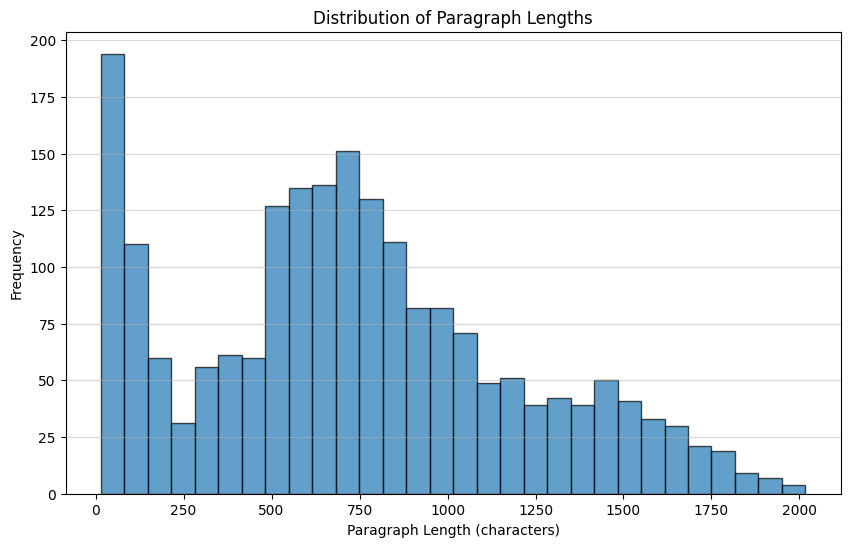

In [8]:
# 1. 지문 길이 계산 (새로운 컬럼 생성)
# 데이터프레임 df에 'paragraph'라는 컬럼이 있다고 가정합니다.
df['paragraph_length'] = df['paragraph'].apply(len)

# 2. 히스토그램 그리기
plt.figure(figsize=(10, 6)) # 그래프 크기를 조금 키웠습니다
plt.hist(df['paragraph_length'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Paragraph Lengths') # 제목 변경
plt.xlabel('Paragraph Length (characters)')    # X축 라벨 변경
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5) # 가독성을 위해 격자 추가
plt.show()